In [1]:
%matplotlib inline

In [20]:
import collections
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import riboutils.ribo_utils as ribo_utils

In [3]:
#orfs_file = "/data/projects/departments/Christoph_Dieterich/riboseq/caenorhabditis_elegans/WBcel235_79/transcript-index/WBcel235.79.genomic-orfs.aug-only.bed.gz"
#orfs_file = "/data/projects/departments/Christoph_Dieterich/riboseq/homo_sapiens/gencode.v19/transcript-index/gencode-v19.genomic-orfs.aug-only.bed.gz"
#orfs_file = "/data/projects/departments/Christoph_Dieterich/riboseq/mus_musculus/GRCm38_79/transcript-index/GRCm38_79.genomic-orfs.aug-only.bed.gz"
#orfs_file = "/home/bmalone/data//homo_sapiens/GRCh38_79/transcript-index/GRCh38_79.genomic-orfs.aug-only.bed.gz"
#orfs_file = "/genomes/caenorhabditis_elegans/WBcel235.79.plus-de-novo/transcript-index/WBcel235.79.plus-de-novo.genomic-orfs.atg-only.bed.gz"
orfs_file = "/prj/grosshans-riboseq/RPF/orf-predictions/early-samples-unique.smooth.predicted-orfs.bed.gz"

orfs = pd.read_csv(orfs_file, sep='\t')
orfs.columns = [c.replace("#", "") for c in orfs.columns]

orf_type_groups = orfs.groupby('orf_type')
counts_pd = orf_type_groups.size()

counts = collections.defaultdict(int)
counts.update(counts_pd.to_dict())

canonical_count = counts['canonical'] + counts['canonical_truncated'] + counts['canonical_extended']
five_prime_count = counts['five_prime'] + counts['five_prime_overlap']
three_prime_count = counts['three_prime'] + counts['three_prime_overlap']
within_count = counts['within']
noncoding_count = counts['noncoding']
suspect_overlap_count = counts['suspect_overlap'] + counts['novel_suspect_overlap']

novel_count = counts['novel']

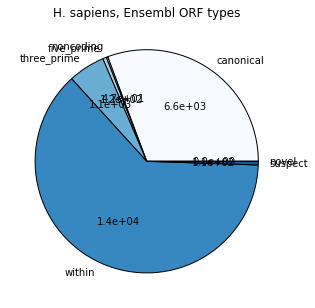

In [19]:
image = "homo-sapiens-ensembl-orf-types.eps"
title = "H. sapiens, Ensembl ORF types"

labels = ['canonical', 'noncoding', 'five_prime', 'three_prime', 'within', 'suspect', 'novel']
fracs = [canonical_count, noncoding_count, five_prime_count, three_prime_count, within_count, suspect_overlap_count, novel_count]

#labels = ['canonical', "", 'five_prime', 'three_prime', 'within', 'suspect']
#fracs = [canonical_count, 0, five_prime_count, three_prime_count, within_count, suspect_overlap_count]


fig, ax = plt.subplots(figsize=(5,5))

cmap = plt.cm.Blues
colors = cmap(np.linspace(0., 1., len(labels)))

patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct="%.1f%%")

for autotext, count in zip(autotexts, fracs):
    #autotext.set_text(u"%s (%d)" % (autotext.get_text(), counts))
    autotext.set_text("{:.1e}".format(count))

ax.set_title(title)

#fig.tight_layout()
if image is not None:
    fig.savefig(image)

In [9]:
counts

orf_type
canonical                 26147
canonical_extended        16769
canonical_truncated      208670
five_prime                 4978
five_prime_overlap         3024
noncoding                 40015
novel                     24331
novel_suspect_overlap      7193
suspect_overlap            1581
three_prime               19144
three_prime_overlap       17105
within                   339102
dtype: int64

In [29]:
def get_orf_label_counts(counts, orf_label):
    orf_types = ribo_utils.orf_type_labels_mapping[orf_label]
    orf_label_counts = np.sum(counts[orf_types])
    
    if np.isnan(orf_label_counts):
        orf_label_counts = 0
    return orf_label_counts

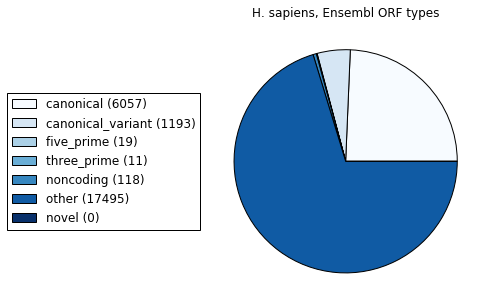

In [30]:
image = None
title = "H. sapiens, Ensembl ORF types"

fracs = counts_pd.values
labels = np.array(counts_pd.index)

labels = ribo_utils.orf_type_labels
fracs = [get_orf_label_counts(counts_pd, l) for l in labels]
labels = ["{} ({})".format(l,f) for l,f in zip(labels, fracs)]

fig, ax = plt.subplots(figsize=(5,5))

cmap = plt.cm.Blues
colors = cmap(np.linspace(0., 1., len(labels)))

#patches, texts, autotexts = ax.pie(fracs, labels=labels, colors=colors, autopct="%.1f%%")
patches, texts = ax.pie(fracs, colors=colors)
lgd = ax.legend(patches, labels, loc="center right", bbox_to_anchor=(0,0.5))

for autotext, count in zip(autotexts, fracs):
    #autotext.set_text(u"%s (%d)" % (autotext.get_text(), counts))
    autotext.set_text("{:.1e}".format(count))

ax.set_title(title)

#fig.tight_layout()
if image is not None:
    fig.savefig(image, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [28]:
fracs

[6057, 1193, 19, 11, 118, 17495, nan]